Data from https://www.dr.dk/

Use webscrabing to find out how many headlines contain the word 'corona'.

In [2]:
import matplotlib.pyplot as plt
import bs4
import requests
import urllib.request
import re

url = 'https://www.dr.dk/'
r_url = requests.get(url)
r_url.raise_for_status()
soup = bs4.BeautifulSoup(r_url.text, 'html.parser')

list_of_headlines = []
list_with_corona = []

#finding all the links/headlines 
headlines = soup.findAll('a')
for headline in headlines:
    list_of_headlines.append(headline.getText())

#making a list of corona-related headlines
for headline in list_of_headlines:
    if('corona' in headline):
        list_with_corona.append(headline)
print(list_with_corona, len(list_with_corona))

['Twitter fjerner tweet fra Trumps coronarådgiver ', 'Status på coronavirus i Danmark ', 'Få de nyeste data her:  Så hårdt er verdens lande ramt af corona ', 'Se tallene:  Sådan smitter coronakrisen af på dansk økonomi ', 'TV Avisen beklager fejl i indslag om coronasmitte blandt mink  ', 'TV Avisen beklager fejl i indslag om coronasmitte blandt mink  '] 6


Use regex to make a list of all words that occur just before and just after coronavirus in the article at https://www.dr.dk/nyheder/indland/status-paa-coronavirus-lige-nu. As in "... xxx coronavirus yyy..." find the words xxx and yyy.

In [17]:
url_article = 'https://www.dr.dk/nyheder/indland/status-paa-coronavirus-lige-nu'

r_url_article = requests.get(url_article)
r_url_article.raise_for_status()
soup2 = bs4.BeautifulSoup(r_url_article.text,'html.parser')

list_of_words = []
all_words_in_article = soup2.findAll('p')
for words in all_words_in_article:
    list_of_words.append(words.getText())


#reducing from full match to only coronavirus matches
p = re.compile('coronavirus')
newList = list(filter(p.findall,list_of_words))
print(newList)

index_friendly_list = []
#splitting the elements into list of iterable words
for element in list_of_words:
    tmp = list(map(lambda x: x,element.split()))
    index_friendly_list.append(tmp)



words_before_after_coronavirus = []
x = 1
for e in index_friendly_list:
    while x < len(e):
        if(e[x] == 'coronavirus'):
            word_before = e[x-1]
            word_after = e[x+1]
            words_before_after_coronavirus.extend([word_before,word_after])
        x+=1
    x=1

#jeg har ikke medberegnet de gange hvor coronavirus står i starten eller slutningen af en sætning, da jeg 
#ikke ser et punktum eller komma som ord.
#havde små problemer med regex så opgaven blev lidt mere kompliceret end den burde have været.
print()
print('Ord som fremkommer før/efter coronavirus: ')
print(words_before_after_coronavirus)



['Se de nyeste tal om coronavirus i Danmark her.', 'Grafen herunder viser, hvor mange danskere der er indlagt på sygehus på grund af coronavirus. Tallet er ekstremt vigtigt at holde øje med, da myndighedernes største bekymring er, at hospitalerne bliver overbebyrdede og får svært ved at tage sig af alle alvorligt syge.', 'Dér kan det i stedet give mening at følge antallet af personer, der bliver testet positiv for coronavirus. Tallet er lidt mere usikkert, fordi en del smittede ikke har symptomer og derfor aldrig bliver testet. Man skal dog passe på med at sammenligne efterårets smitte med foråret, hvor der var et stort mørketal af smittede, der aldrig blev testet.', 'Statens Serum Institut opdaterer løbende, hvor mange patienter i de enkelte kommuner, der er blevet testet og har fået bekræftet, at de har Covid-19, altså den sygdom man får af coronavirus.', 'Lægemiddelmyndigheder verden over støtter forskere og virksomheder i hurtigt at udvikle medicin og vaccine mod coronavirus og for

How many hrefs link to a sub page on dr.dk/nyheder/..., dr.dk/sporten/..., dr.dk/mad/... and dr.dk/musik/... Make a pie chart to show the amount of sports news, food news, music news and regular news.

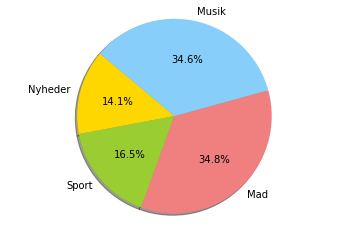

In [3]:
url_nyheder = 'https://www.dr.dk/nyheder'
r_url_nyheder = requests.get(url_nyheder)
r_url_nyheder.raise_for_status()
soup3 = bs4.BeautifulSoup(r_url_nyheder.text,'html.parser')
nyheder = soup3.findAll('a')
news = len(nyheder)

url_sporten = 'https://www.dr.dk/sporten'
r_url_sporten = requests.get(url_sporten)
r_url_sporten.raise_for_status()
soup4 = bs4.BeautifulSoup(r_url_sporten.text,'html.parser')
sporten = soup4.findAll('a')
sport = len(sporten)

url_mad = 'https://www.dr.dk/mad'
r_url_mad = requests.get(url_mad)
r_url_mad.raise_for_status()
soup5 = bs4.BeautifulSoup(r_url_mad.text,'html.parser')
mad = soup5.findAll('a')
food = len(mad)

url_musik = 'https://www.dr.dk/musik'
r_url_musik = requests.get(url_musik)
r_url_musik.raise_for_status()
soup6 = bs4.BeautifulSoup(r_url_musik.text,'html.parser')
musik = soup6.findAll('a')
music = len(musik)

# Data to plot
labels = 'Nyheder', 'Sport', 'Mad', 'Musik'
sizes = [news, sport, food, music]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0, 0, 0, 0)

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

In [ ]:
#Jeg nåede desværre ikke at lave den sidste opgave
